In [2]:
!pip install simpledbf


  Preparing metadata (setup.py) ... done
  Created wheel for simpledbf: filename=simpledbf-0.2.6-py3-none-any.whl size=13786 sha256=51fee2860d1e4584270a42134b3173a390b4a87e482fe09771dae91d37c8a3cf
  Stored in directory: /root/.cache/pip/wheels/37/52/21/14be45b7c160488637e82d6a317f4379458bb4dd60be21d5fa
Successfully built simpledbf


In [3]:
from google.colab import files
from simpledbf import Dbf5
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
uploaded = files.upload()

Saving M08_04_Juarez.dbf to M08_04_Juarez.dbf


In [5]:
dbf = Dbf5('M08_04_Juarez.dbf', codec='latin-1')
df = dbf.to_dataframe()

df.head()

,cve_ent,cve_mun,cve_sun,cvegeo,sun,gmu,iisu_sun,iisu_cd,Pob_2010,Empleo,E_basica,E_media,E_superior,Salud_cama,Salud_cons,Abasto,Espacio_ab,Cultura,Est_Tpte
0,08,037,M08.04,0803700012732036,Juárez,muy bajo,Muy Alto,Muy Alto,79,24351.0,3.0,1.0,1.0,0.0,0.0,33.0,2134.0,0.0,0.0
1,08,037,M08.04,0803700012732032,Juárez,muy bajo,Muy Alto,Muy Alto,93,27960.0,3.0,1.0,1.0,0.0,0.0,25.0,184.0,0.0,0.0
2,08,037,M08.04,0803700012732024,Juárez,muy bajo,Muy Alto,Muy Alto,66,27960.0,3.0,1.0,1.0,0.0,0.0,25.0,184.0,0.0,0.0
3,08,037,M08.04,0803700012732019,Juárez,muy bajo,Muy Alto,Muy Alto,26,28519.0,3.0,1.0,1.0,0.0,0.0,24.0,727.0,0.0,0.0
4,08,037,M08.04,0803700012732045,Juárez,muy bajo,Muy Alto,Muy Alto,61,21399.0,0.0,1.0,1.0,0.0,0.0,25.0,19116.0,0.0,0.0


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22418 entries, 0 to 22417
Data columns (total 19 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   cve_ent     22418 non-null  object 
 1   cve_mun     22418 non-null  object 
 2   cve_sun     22418 non-null  object 
 3   cvegeo      22418 non-null  object 
 4   sun         22418 non-null  object 
 5   gmu         22418 non-null  object 
 6   iisu_sun    22418 non-null  object 
 7   iisu_cd     22418 non-null  object 
 8   Pob_2010    22418 non-null  int64  
 9   Empleo      22418 non-null  float64
 10  E_basica    22418 non-null  float64
 11  E_media     22418 non-null  float64
 12  E_superior  22418 non-null  float64
 13  Salud_cama  22418 non-null  float64
 14  Salud_cons  22418 non-null  float64
 15  Abasto      22418 non-null  float64
 16  Espacio_ab  22418 non-null  float64
 17  Cultura     22418 non-null  float64
 18  Est_Tpte    22418 non-null  float64
dtypes: float64(10), int64(1),

In [7]:
#Eliminar columnas que no necesito
df= df.drop(columns =['cve_ent','cve_mun','cve_sun','cvegeo','sun'])

In [8]:
#Revisar valores faltantes
df.isna().sum()

,0
gmu,0
iisu_sun,0
iisu_cd,0
Pob_2010,0
Empleo,0
E_basica,0
E_media,0
E_superior,0
Salud_cama,0
Salud_cons,0


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22418 entries, 0 to 22417
Data columns (total 14 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   gmu         22418 non-null  object 
 1   iisu_sun    22418 non-null  object 
 2   iisu_cd     22418 non-null  object 
 3   Pob_2010    22418 non-null  int64  
 4   Empleo      22418 non-null  float64
 5   E_basica    22418 non-null  float64
 6   E_media     22418 non-null  float64
 7   E_superior  22418 non-null  float64
 8   Salud_cama  22418 non-null  float64
 9   Salud_cons  22418 non-null  float64
 10  Abasto      22418 non-null  float64
 11  Espacio_ab  22418 non-null  float64
 12  Cultura     22418 non-null  float64
 13  Est_Tpte    22418 non-null  float64
dtypes: float64(10), int64(1), object(3)
memory usage: 2.4+ MB


In [10]:
print(df['gmu'].unique())
print(df['iisu_cd'].unique())
print(df['iisu_sun'].unique())


['muy bajo' 's/p' 'bajo' 'medio' 'alto' 'n/d' 'muy alto']
['Muy Alto' 'S/P' 'Alto' 'Intermedio' 'Bajo' 'Muy Bajo' 'N/D']
['Muy Alto' 'S/P' 'Alto' 'Intermedio' 'Bajo' 'N/D' 'Muy Bajo']


In [11]:
#Limpiar los datos de S/P y N/D
df = df[~df.isin(['S/P', 'N/D']).any(axis=1)]


In [12]:
#Revisar si hay duplicados
df.duplicated().sum()

np.int64(853)

In [13]:
#Renomabrar datos para un mejor entendimiento en gráficos

df.rename(columns={'gmu': 'grado_marginacion',
                         'iisu_sun': 'indice_inclusion_nac',
                         'iisu_cd': 'indice_inclusion_local',
                         'Pob_2010': 'poblacion',
                         'Empleo': 'empleos_accesibles',
                         'E_basica': 'educacion_basica',
                         'E_media': 'educacion_media',
                         'E_superior': 'educacion_superior',
                         'Salud_cama:': 'salud_camas',
                         'Salud_cons:': 'consultorios_accesibles',
                         'Abasto':'abastos',
                         'Espacio_ab':'espacios_abiertos',
                         'Cultura':'instalacion_cultural',
                         'Est_Tpte': 'estacion_transporte'}, inplace=True)


/tmp/ipython-input-3840591836.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.rename(columns={'gmu': 'grado_marginacion',


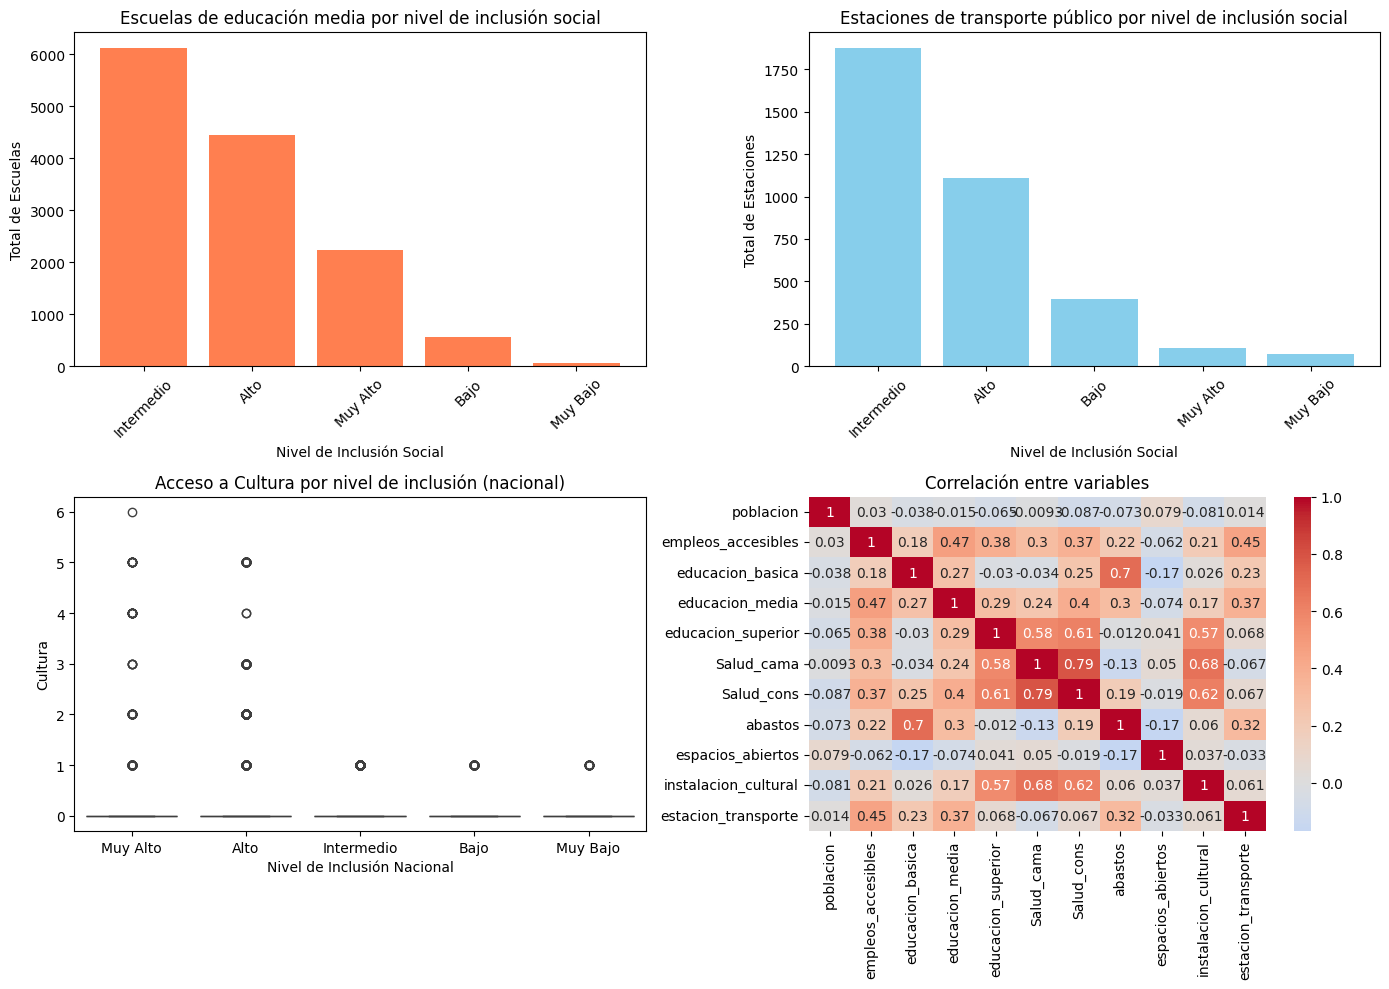

In [14]:


# Preparar los datos para cada gráfica
media_totales = df.groupby('indice_inclusion_nac')['educacion_media'].sum().sort_values(ascending=False)
total_estaciones = df.groupby('indice_inclusion_local')['estacion_transporte'].sum().sort_values(ascending=False)
cultura_data = df[['indice_inclusion_nac', 'instalacion_cultural']].dropna()
correlation_matrix = df.corr(numeric_only=True)

# Crear figura y ejes (2x2 cuadrantes)
fig, axs = plt.subplots(2, 2, figsize=(14, 10))

# Gráfico 1: Total de escuelas de educación media
axs[0, 0].bar(media_totales.index, media_totales.values, color='coral')
axs[0, 0].set_title('Escuelas de educación media por nivel de inclusión social')
axs[0, 0].set_xlabel('Nivel de Inclusión Social')
axs[0, 0].set_ylabel('Total de Escuelas')
axs[0, 0].tick_params(axis='x', rotation=45)

# Gráfico 2: Total de estaciones de transporte
axs[0, 1].bar(total_estaciones.index, total_estaciones.values, color='skyblue')
axs[0, 1].set_title('Estaciones de transporte público por nivel de inclusión social')
axs[0, 1].set_xlabel('Nivel de Inclusión Social')
axs[0, 1].set_ylabel('Total de Estaciones')
axs[0, 1].tick_params(axis='x', rotation=45)

# Gráfico 3: Boxplot de Cultura vs Nivel de inclusión nacional
sns.boxplot(ax=axs[1, 0], data=cultura_data, x='indice_inclusion_nac', y='instalacion_cultural')
axs[1, 0].set_title('Acceso a Cultura por nivel de inclusión (nacional)')
axs[1, 0].set_xlabel('Nivel de Inclusión Nacional')
axs[1, 0].set_ylabel('Cultura')

# Gráfico 4: Heatmap de correlación
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0, ax=axs[1, 1])
axs[1, 1].set_title('Correlación entre variables')

plt.tight_layout()
plt.show()


In [15]:
df.to_csv("datos_limpios.csv", index=False)
files.download("datos_limpios.csv")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [20]:
print(df['indice_inclusion_local'].value_counts(normalize=True)*100)

indice_inclusion_local
Intermedio    48.326327
Bajo          20.769111
Alto          20.073693
Muy Alto       8.505890
Muy Bajo       2.324978
Name: proportion, dtype: float64
